In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
customers = pd.read_csv("Customers.csv")
transaction = pd.read_csv("Transactions.csv")

In [3]:
df = pd.merge(customers,transaction,on='CustomerID')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   CustomerName     1000 non-null   object 
 2   Region           1000 non-null   object 
 3   SignupDate       1000 non-null   object 
 4   TransactionID    1000 non-null   object 
 5   ProductID        1000 non-null   object 
 6   TransactionDate  1000 non-null   object 
 7   Quantity         1000 non-null   int64  
 8   TotalValue       1000 non-null   float64
 9   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


In [5]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [6]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Tenure'] = (df['TransactionDate']-df['SignupDate']).dt.days

In [7]:
customer_features = df.groupby('CustomerID').agg({ 
    'Quantity':['sum','mean'], 
    'TotalValue': ['sum', 'mean'], 
    'TransactionID' : 'count', 
    'ProductID': 'nunique',
    'Tenure': 'max'
}).reset_index()

In [8]:
customer_features

CustomerID Quantity           TotalValue              TransactionID  \
                    sum      mean        sum         mean         count   
0        C0001       12  2.400000    3354.52   670.904000             5   
1        C0002       10  2.500000    1862.74   465.685000             4   
2        C0003       14  3.500000    2725.38   681.345000             4   
3        C0004       23  2.875000    5354.88   669.360000             8   
4        C0005        7  2.333333    2034.24   678.080000             3   
..         ...      ...       ...        ...          ...           ...   
194      C0196       12  3.000000    4982.88  1245.720000             4   
195      C0197        9  3.000000    1928.65   642.883333             3   
196      C0198        3  1.500000     931.83   465.915000             2   
197      C0199        9  2.250000    1979.28   494.820000             4   
198      C0200       16  3.200000    4758.60   951.720000             5   

    ProductID Tenure  
      nunique    max  
0           5    846  
1           4   1024  
2           4    170  
3           8    806  
4           3    812  
..        ...    ...  
194         3    922  
195         3    647  
196         2    950  
197         4    693  
198         5    549  

[199 rows x 8 columns]

In [9]:
customer_features.columns = ['CustomerID','Total_Quantity','Avg_Quantity','Total_Revenue','Avg_Revenue',
                             'Transactions','Unique_Products','Tenure']

In [10]:
customer_features.shape

(199, 8)

In [11]:
customer_features.head()

,CustomerID,Total_Quantity,Avg_Quantity,Total_Revenue,Avg_Revenue,Transactions,Unique_Products,Tenure
0,C0001,12,2.400000,3354.52,670.904,5,5,846
1,C0002,10,2.500000,1862.74,465.685,4,4,1024
2,C0003,14,3.500000,2725.38,681.345,4,4,170
3,C0004,23,2.875000,5354.88,669.360,8,8,806
4,C0005,7,2.333333,2034.24,678.080,3,3,812


In [12]:
features = ['Total_Quantity','Avg_Quantity','Total_Revenue','Avg_Revenue','Transactions','Unique_Products','Tenure']

X = customer_features[features]

In [13]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
inertia = []
sil_scores = []
db_indexes = []
ch_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    
    # Metrics
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))
    db_indexes.append(davies_bouldin_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X, labels))

C:\Users\SS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

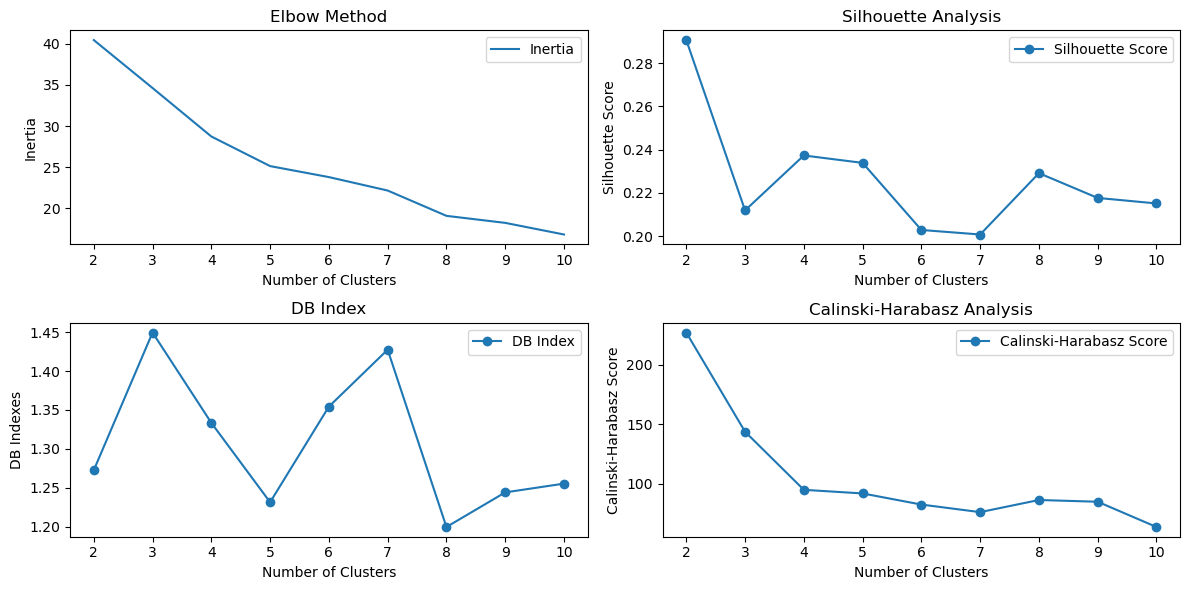

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Elbow Method
axes[0, 0].plot(range(2, 11), inertia, label='Inertia')
axes[0, 0].set_xlabel("Number of Clusters")
axes[0, 0].set_ylabel("Inertia")
axes[0, 0].set_title("Elbow Method")
axes[0, 0].legend()

# Silhouette Analysis
axes[0, 1].plot(range(2, 11), sil_scores, marker='o', label='Silhouette Score')
axes[0, 1].set_xlabel("Number of Clusters")
axes[0, 1].set_ylabel("Silhouette Score")
axes[0, 1].set_title("Silhouette Analysis")
axes[0, 1].legend()

# DB Index Plot
axes[1, 0].plot(range(2, 11), db_indexes, marker='o', label='DB Index')
axes[1, 0].set_xlabel("Number of Clusters")
axes[1, 0].set_ylabel("DB Indexes")
axes[1, 0].set_title("DB Index")
axes[1, 0].legend()

# Calinski-Harabasz Score Plot
axes[1, 1].plot(range(2, 11), ch_scores, marker='o', label='Calinski-Harabasz Score')
axes[1, 1].set_xlabel("Number of Clusters")
axes[1, 1].set_ylabel("Calinski-Harabasz Score")
axes[1, 1].set_title("Calinski-Harabasz Analysis")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [16]:
optimal_k = db_indexes.index(min(db_indexes)) + 2
kmeans = KMeans(n_clusters=optimal_k,random_state=42)
kmeans.fit(X_scaled)

C:\Users\SS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(random_state=42)

In [17]:
X['Cluster'] = kmeans.labels_

In [18]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
X['PCA1'] = pca_data[:, 0]
X['PCA2'] = pca_data[:, 1]

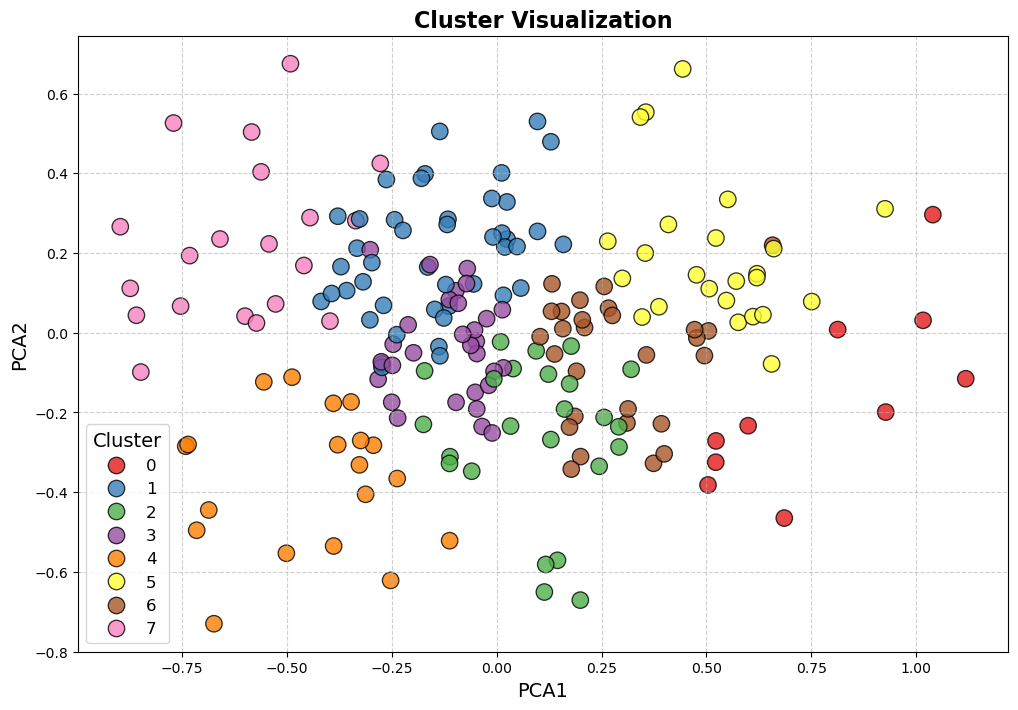

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=X, 
    palette='Set1', s=140, edgecolor='black', alpha=0.8
)

plt.title("Cluster Visualization", fontsize=16, fontweight='bold')
plt.xlabel("PCA1", fontsize=14)
plt.ylabel("PCA2", fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14)

 
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [20]:
print("\nClustering Results:")
print(f"Number of clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {db_indexes[optimal_k-2]:.3f}")
print(f"Silhouette Score: {sil_scores[optimal_k-2]:.3f}")
print(f"Calinski-Harabasz Score: {ch_scores[optimal_k-2]:.3f}")


Clustering Results:
Number of clusters: 8
Davies-Bouldin Index: 1.200
Silhouette Score: 0.229
Calinski-Harabasz Score: 86.211


In [21]:
cluster_profiles = X.groupby('Cluster')[features].mean().reset_index()
cluster_profiles.columns = ['Cluster','Total_Quantity','Avg_Quantity','Total_Revenue','Avg_Revenue','Transactions','Unique_Products','Tenure']
cluster_profiles

,Cluster,Total_Quantity,Avg_Quantity,Total_Revenue,Avg_Revenue,Transactions,Unique_Products,Tenure
0,0,25.600000,2.901923,7199.549000,824.018080,8.900000,8.500000,368.700000
1,1,10.068182,2.465639,2559.224091,629.487458,4.159091,4.090909,764.659091
2,2,15.333333,3.231944,4543.885833,970.781382,4.750000,4.541667,452.333333
3,3,10.933333,2.282222,2835.749667,589.418522,4.833333,4.766667,205.900000
4,4,6.631579,2.938596,2159.118421,908.127149,2.315789,2.315789,83.315789
5,5,19.583333,2.551868,5470.143333,719.632013,7.708333,7.416667,841.125000
6,6,16.750000,2.415816,4394.893214,639.231213,7.000000,6.821429,212.821429
7,7,3.850000,1.768333,795.238000,374.273017,2.200000,2.200000,409.200000
